In [13]:
from skimage import data
import matplotlib.pyplot as plt

In [4]:
rocket_image = data.rocket()

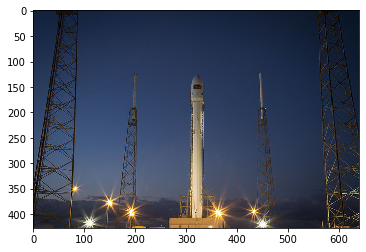

In [5]:
plt.imshow(rocket_image)

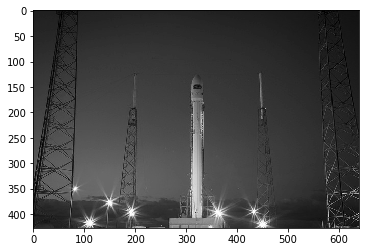

In [6]:
from skimage import color
grayscale=color.rgb2gray(rocket_image)
plt.imshow(grayscale, cmap='gray')

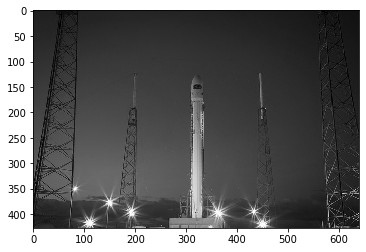

In [7]:
rgb=color.grey2rgb(grayscale)
plt.imshow(rgb)

In [8]:
rgb.shape

(427, 640, 3)

In [9]:
red = rgb[:,:,0]

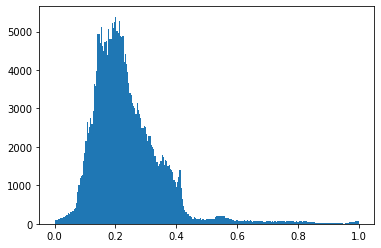

In [10]:
plt.hist(red.ravel(), bins=256)
plt.show()

In [11]:
camera=data.camera()

In [10]:
def show_image(image, title='Image', cmap_type='gray'):
#     plt.figure(figsize=(20,10))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

## Threshold

In [13]:
# Obtain the optimal threshold value
thresh = 127
# Apply thresholding to the image
binary = camera > thresh
# Show the original and thresholded
binary =camera > thresh
invertbinary = camera <= thresh

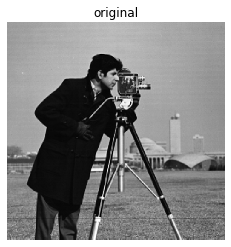

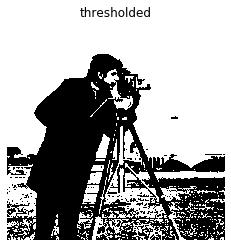

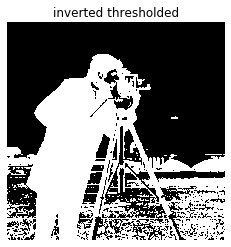

In [14]:
show_image(camera,'original')
show_image(binary, 'thresholded')
show_image(invertbinary,'inverted thresholded' )

### Global or histogram based: good for uniform backgrounds
### Local or adaptive: for uneven background illumination

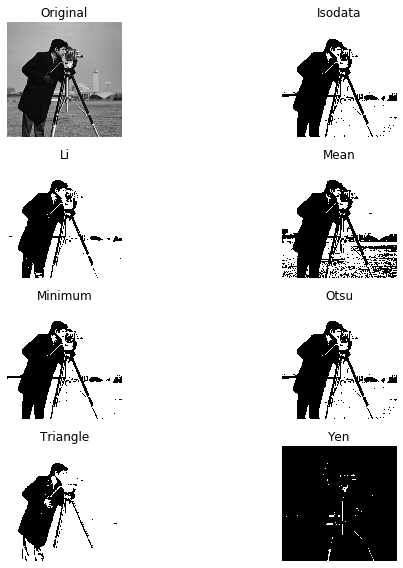

In [15]:
from skimage.filters import try_all_threshold
# Obtain all the resulting images
fig, ax = try_all_threshold(camera,figsize=(10, 8), verbose=False)
# Showing resulting plots
plt.show()

Optimal thresh value:
Global:
Uniform background

In [16]:
from skimage.filters import threshold_minimum

In [17]:
thresh=threshold_minimum(camera)

In [18]:
binary_global=thresh <= camera

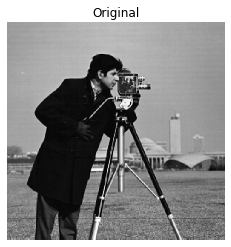

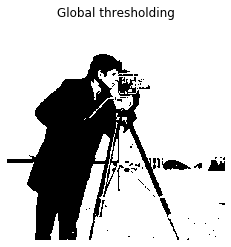

In [19]:
show_image(camera, 'Original')
show_image(binary_global, 'Global thresholding')

In [20]:
value = camera.ravel().astype('int')

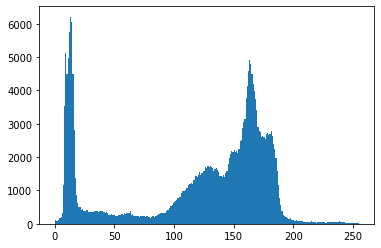

In [21]:
plt.hist(value, bins = 255)
plt.show()

In [22]:
from skimage.filters import threshold_local

In [23]:
thresh=threshold_local(camera, block_size=35)

In [24]:
binary_local= camera <= thresh

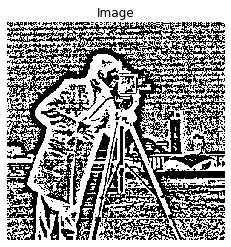

In [25]:
#helpfull when checking the text
show_image(binary_local)

# Edge_Detection

In [26]:
coins = data.coins()

In [27]:
from skimage.filters import sobel, sobel_h
# but for thi image should be in rgb2gray

In [28]:
sobel_edge=sobel(coins)
sobel_edge_h=sobel_h(coins)

In [3]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
    sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

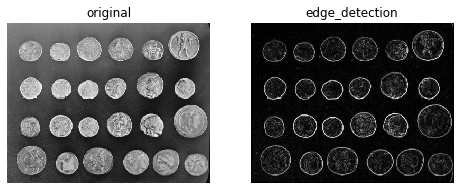

In [30]:
plot_comparison(coins, sobel_edge, 'edge_detection')

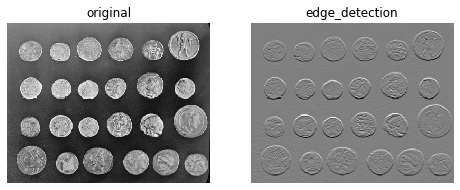

In [31]:
plot_comparison(coins, sobel_edge_h, 'edge_detection')

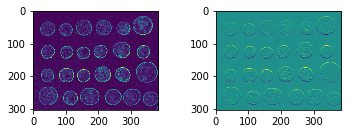

In [32]:
plt.subplot(221)
plt.imshow(sobel_edge)
plt.subplot(222)
plt.imshow(sobel_edge_h)

# Noise Removal

In [33]:
from skimage.io import imread

In [45]:
sharp=imread('sharp.jpg')

In [46]:
from skimage.filters import gaussian

In [47]:
gaussian_blur=gaussian(sharp,multichannel=False,)

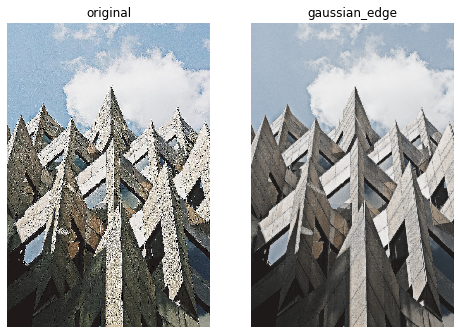

In [50]:
plot_comparison(sharp,gaussian_blur, 'gaussian_edge')

# Enhance Contrast

In [51]:
arial=imread('arial.png')

In [52]:
from skimage import exposure

In [53]:
equalize_hist_arial=exposure.equalize_hist(arial)

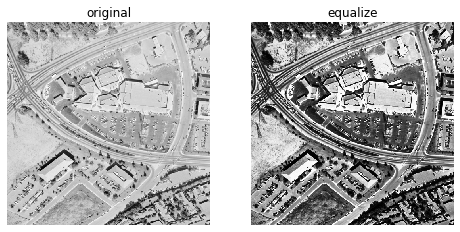

In [54]:
plot_comparison(arial, equalize_hist_arial,'equalize')

In [64]:
#more the clip limit then more the contrast
adapthist_arial=exposure.equalize_adapthist(arial, clip_limit=0.03)

An algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. Local details can therefore be enhanced even in regions that are darker or lighter than most of the image.

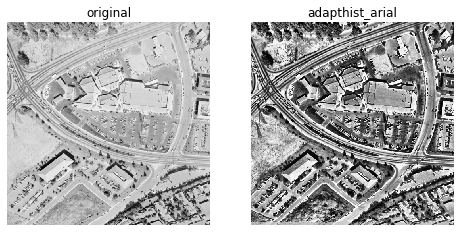

In [66]:
plot_comparison(arial, adapthist_arial, "adapthist_arial")

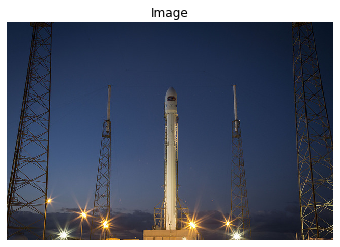

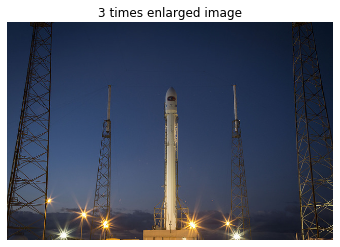

In [68]:
from skimage import data
from skimage.transform import rescale
# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, multichannel=True)

# Show original and resulting image
show_image(rocket_image)
show_image(enlarged_rocket_image, "3 times enlarged image")


# Morphology

## Erosion

As you can see, erosion is useful for removing minor white noise.

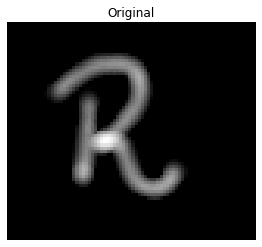

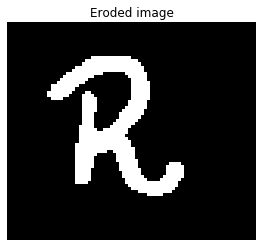

In [78]:
# Import the morphology module
from skimage import morphology
upper_r_image=imread('letter.png')
upper_r_image=color.rgb2gray(upper_r_image)
# Obtain the eroded shape 
eroded_image_shape = morphology.binary_erosion(upper_r_image) 

# See results
show_image(upper_r_image, 'Original')
show_image(eroded_image_shape, 'Eroded image')


# Dilation

You removed the noise of the segmented image and now it's more uniform.

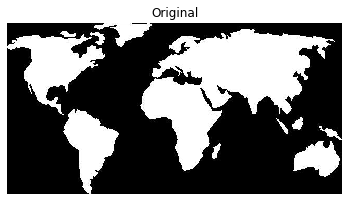

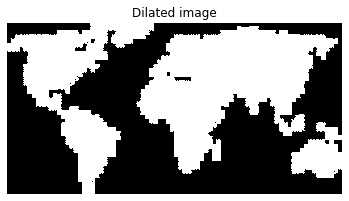

In [81]:
# Import the module
from skimage import morphology

world_image = imread('world.jpg')
world_image = color.rgb2gray(world_image)
# Obtain the dilated image 
dilated_image = morphology.binary_dilation(world_image)

# See results
show_image(world_image, 'Original')
show_image(dilated_image, 'Dilated image')


# Image Restoration

In [84]:
damaged=imread('damaged.png')

In [85]:
from skimage.restoration import inpaint

In [93]:
import numpy as np

In [94]:
def get_mask(image):
    ''' Creates mask with three defect regions '''
    mask = np.zeros(image.shape[:-1])
    mask[101:106, 0:240] = 1
    mask[152:154, 0:60] = 1
    mask[153:155, 60:100] = 1
    mask[154:156, 100:120] = 1
    mask[155:156, 120:140] = 1
    mask[212:217, 0:150] = 1
    mask[217:222, 150:256] = 1
    return mask

In [95]:
repaired=inpaint.inpaint_biharmonic(damaged,mask = get_mask(damaged),multichannel=True)

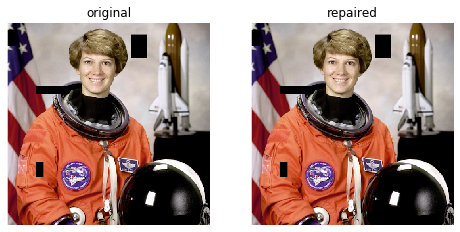

In [99]:
#Here the get_mask() function neeed to configure
plot_comparison(damaged, repaired, 'repaired')

In [104]:
def get_mask(image_with_logo):
    # Initialize the mask
    mask = np.zeros(image_with_logo.shape[:-1])
    # Set the pixels where the logo is to 1
    mask[210:272, 360:425] = 1
    return mask

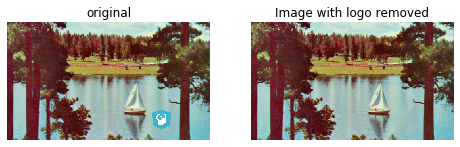

In [106]:
image_with_logo=imread('with_logo.png')

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,get_mask(image_with_logo),
                                  multichannel=True
                                  )

# Show the original and logo removed images
plot_comparison(image_with_logo,image_logo_removed, 'Image with logo removed')


# Denoise

## Add Noise

In [107]:
from  skimage import data

In [108]:
coffee=data.coffee()

In [111]:
from skimage.util import random_noise

In [112]:
coffee_noise= random_noise(coffee)

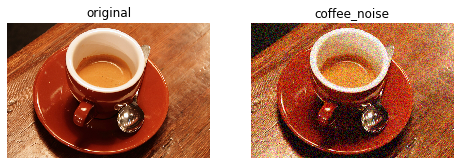

In [113]:
plot_comparison(coffee, coffee_noise, 'coffee_noise')

## Denoise

1. Total variation (TV): Smoothning effect
2. Bilateral: Edges preserved
3. Wavelet denoising
4. Non-local means denoising

## Total variation (TV): denoise and smoothening

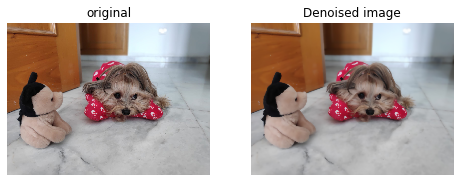

In [116]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle
noisy_image = imread('miny.png')
# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, 
                                      multichannel=True)

# Show the noisy and denoised images

plot_comparison(noisy_image,denoised_image, 'Denoised image')


## Bilateral: Edges preserved: Edges sharpen

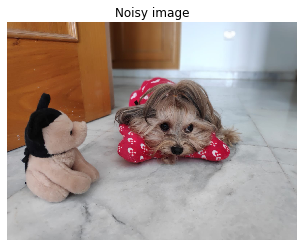

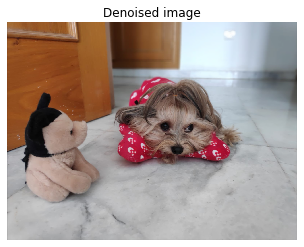

In [117]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral
noisy_image = imread('miny.png')
# Apply bilateral filter denoising
denoised_image = denoise_bilateral(noisy_image, 
                                   multichannel=True)

# Show original and resulting images
show_image(noisy_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')


# Segmentation using superpixel

In [118]:
from skimage import data

In [119]:
coffee = data.coffee()

In [125]:
from skimage.segmentation import slic
from skimage.color import label2rgb


In [138]:
segmented=slic(coffee, n_segments=300)
#increase the value to increase to segment regions(300)

In [139]:
image=label2rgb(segmented, coffee, kind='avg' )

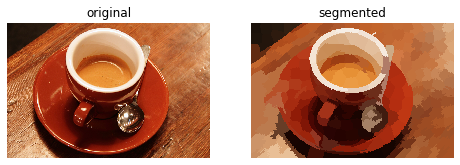

In [140]:
plot_comparison(coffee, image, 'segmented')

# Contours

In [23]:
horse_image.shape

(264, 315, 4)

In [28]:

def show_image_contours(image, contours):
    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.gray)

    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

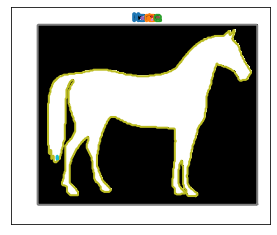

In [29]:
# Import the modules
from skimage import measure, color
from skimage.io import imread
# Obtain the horse image
horse_image = imread('horse.png')
horse_image=color.rgb2gray(horse_image)
# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

# Shows the image with contours found
show_image_contours(horse_image, contours)


Use of binary image in contour detection:
Contours are useful tool for shape analysis and object detection and recognition. We take in binary image (in other words, images whose pixels have only 2 possible values).So before finding contours, apply threshold or canny edge detection.

Steps for finding the contours:
1)Convert to grayscale

2)Convert to binary image

3)Find contours

Draw contours :
To draw the contours, cv2.drawContours function is used. It can also be used to draw any shape provided you have its boundary points.

Properties of contours:
1)To find the area.

2)To find the perimeter

# Find contours of an image that is not binary

In [31]:
image_dices=imread('dices.png')

In [34]:
from skimage import filters
# Make the image grayscale
image_dices = color.rgb2gray(image_dices)

# Obtain the optimal thresh value
thresh = filters.threshold_otsu(image_dices)

# Apply thresholding
binary = image_dices > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)


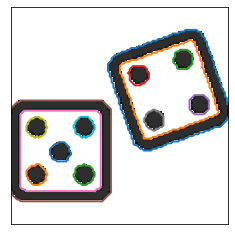

In [35]:
show_image_contours(image_dices, contours)

In [39]:
shape_contours = [cnt.shape[0] for cnt in contours]

In [40]:
shape_contours

[257, 221, 41, 43, 41, 174, 181, 43, 47, 47, 43, 45, 45]

This time we'll determine what number was rolled for the dice, by counting the dots in the image.

The contours found in the previous exercise are preloaded as contours.

Create a list with all contour's shapes as shape_contours. You can see all the contours shapes by calling shape_contours in the console, once you have created it.

Check that most of the contours aren't bigger in size than 50. If you count them, they are the exact number of dots in the image.

show_image_contour(image, contours) is a preloaded function that displays the image with all contours found using Matplotlib.

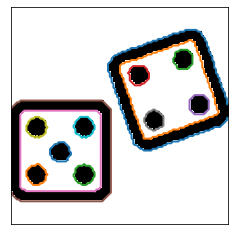

Dice's dots number: 9. 


In [38]:
import numpy as np
# Create list with the shape of each contour 
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contours(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

# Edge Detection with canny(gusssian denoise - gamma)

In [50]:
lemmon=imread('lemmon.jpg')

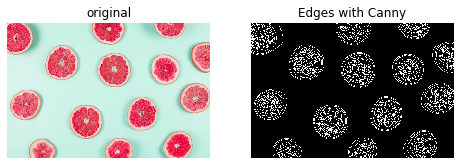

In [53]:
# Import the canny edge detector 
from skimage.feature import canny
from skimage import color

# Convert image to grayscale
grapefruit = color.rgb2grey(lemmon)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
plot_comparison(lemmon,canny_edges, "Edges with Canny")


Let's now try to spot just the outer shape of the grapefruits, the circles. You can do this by applying a more intense Gaussian filter to first make the image smoother. This can be achieved by specifying a bigger sigma in the canny function.
In this exercise, you'll experiment with sigma values of the canny() function.


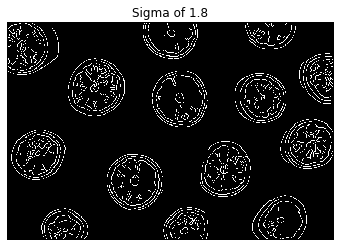

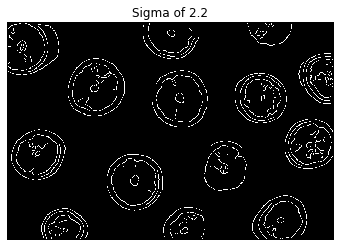

In [54]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")


## Show image with contours

In [56]:
def show_image_with_corners(image, coords, title="Corners detected"):    
    plt.imshow(image, interpolation='nearest', cmap='gray')    
    plt.title(title)    
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)   
    plt.axis('off')  
    plt.show()

In [57]:
corner=imread('corners_building.jpg')

In [59]:
from skimage.feature import corner_harris, corner_peaks
from skimage import color

In [67]:
# Convert image from RGB-3 to grayscale
building_image=color.rgb2gray(corner)

In [68]:
# Apply the detector  to measure the possible corners
measure_image=corner_harris(building_image)

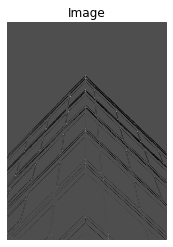

In [69]:
show_image(measure_image)

In [70]:
# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)


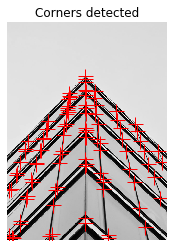

In [71]:
show_image_with_corners(building_image, coords)

With a min_distance set to 2, we detect a total 98 corners in the image.
With a min_distance set to 40, we detect a total 36 corners in the image.


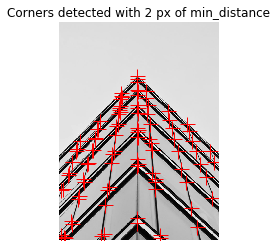

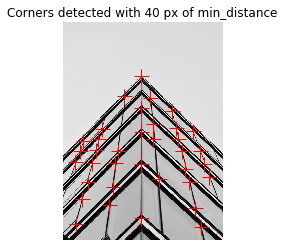

In [72]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance set to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40)
print("With a min_distance set to 40, we detect a total", len(coords_w_min_40), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_2, "Corners detected with 2 px of min_distance")
show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 40 px of min_distance")

Well done! With a 40-pixel distance between the corners there are a lot less corners than with 2 pixels.

# Face Detection

In [98]:
from skimage.feature import Cascade

In [82]:
def show_detected_face(result, detected, title="Face image"):    
    plt.imshow(result)    
    img_desc = plt.gca()    
    plt.set_cmap('gray')   
    plt.title(title) 
    plt.axis('off')
    for patch in detected:   
        img_desc.add_patch(        
            patches.Rectangle(              
                (patch['c'], patch['r']),      
                patch['width'],             
                patch['height'],          
                fill=False,color='r',linewidth=2)    
        )  
    plt.show()

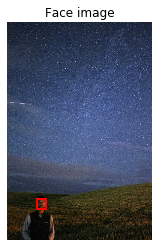

In [116]:
# Load the trained file from data
from matplotlib import patches
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
night_image=imread('face_det3.jpg')
# night_image=imread('rahul.jpg')
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200))

# Show the detected faces
show_detected_face(night_image, detected)

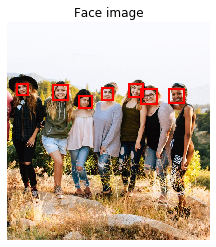

In [97]:
# Load the trained file from data
from matplotlib import patches
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
# night_image=imread('face_det3.jpg')
night_image=imread('friend.jpg')
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200))

# Show the detected faces
show_detected_face(night_image, detected)

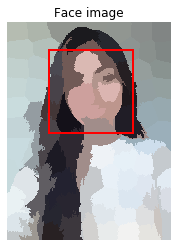

In [122]:

from skimage.segmentation import slic
from skimage.color import label2rgb


profile_image=imread('profile_img.jpg')

segments = slic(profile_image)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')


trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# night_image=imread('rahul.jpg')
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

# Mini Project (Blurring the face)

In [316]:
from skimage.io import imread
from skimage.filters import gaussian
from skimage.feature import Cascade
from skimage import data
import numpy as np

In [349]:
#load image
image=imread('face_bllur.jpg')

In [350]:
trained_data = data.lbp_frontal_face_cascade_filename()

In [351]:
#initialize cascade
detector=Cascade(trained_data)

In [352]:
#detecting the faces from the image woth 10*10 to 200*200 window
detected=detector.detect_multi_scale(img=image,
                           scale_factor=1.2,
                           step_ratio=1,
                           min_size=(10,10),
                           max_size=(200,200))

In [353]:
detected[0]

{'r': 261, 'c': 548, 'width': 78, 'height': 78}

In [354]:
def get_only_faces(image,d):
    face=image[d['r']:d['r']+ d['width'], d['c']:d['c'] + d['height']]
#     show_image(face)
    return face

In [355]:
def mergeBlurryFace(d,original,gaussian_image):
#     print(gaussian_image)
    # X and Y starting points of the face rectangle  
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle 
    width, height = d['r'] + d['width'],  d['c'] + d['height']   
    original[ x:width, y:height] =  gaussian_image
    
    return original

In [356]:
def show_image(image, title='Image'):
#     plt.figure(figsize=(20,10))
#     plt.imshow(image, cmap=cmap_type)
    plt.imshow((image).astype(np.uint8))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [357]:
resulting_image=None
img=None
for d in detected:
    if resulting_image is None:
        resulting_image =image.astype('float')
    face=get_only_faces(resulting_image,d)
    gaussian_face=gaussian(face, multichannel=True,sigma=8)
#     show_image(gaussian_face)
#     print(gaussian_face)
    resulting_image=mergeBlurryFace(d,resulting_image,gaussian_face)


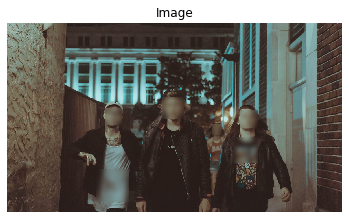

In [358]:
show_image(resulting_image)